In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model

## (1) 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- age: 나이
- sex: 성별
- bmi: BMI(Body mass index)지수
- bp: 평균혈압
- s1~s6: 6종류의 혈액검사수치

종속변수 `target`는 1년 뒤 측정한 당뇨병의 진행률이다.

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [5]:
df.shape

(442, 11)

### 변수간 상관관계 

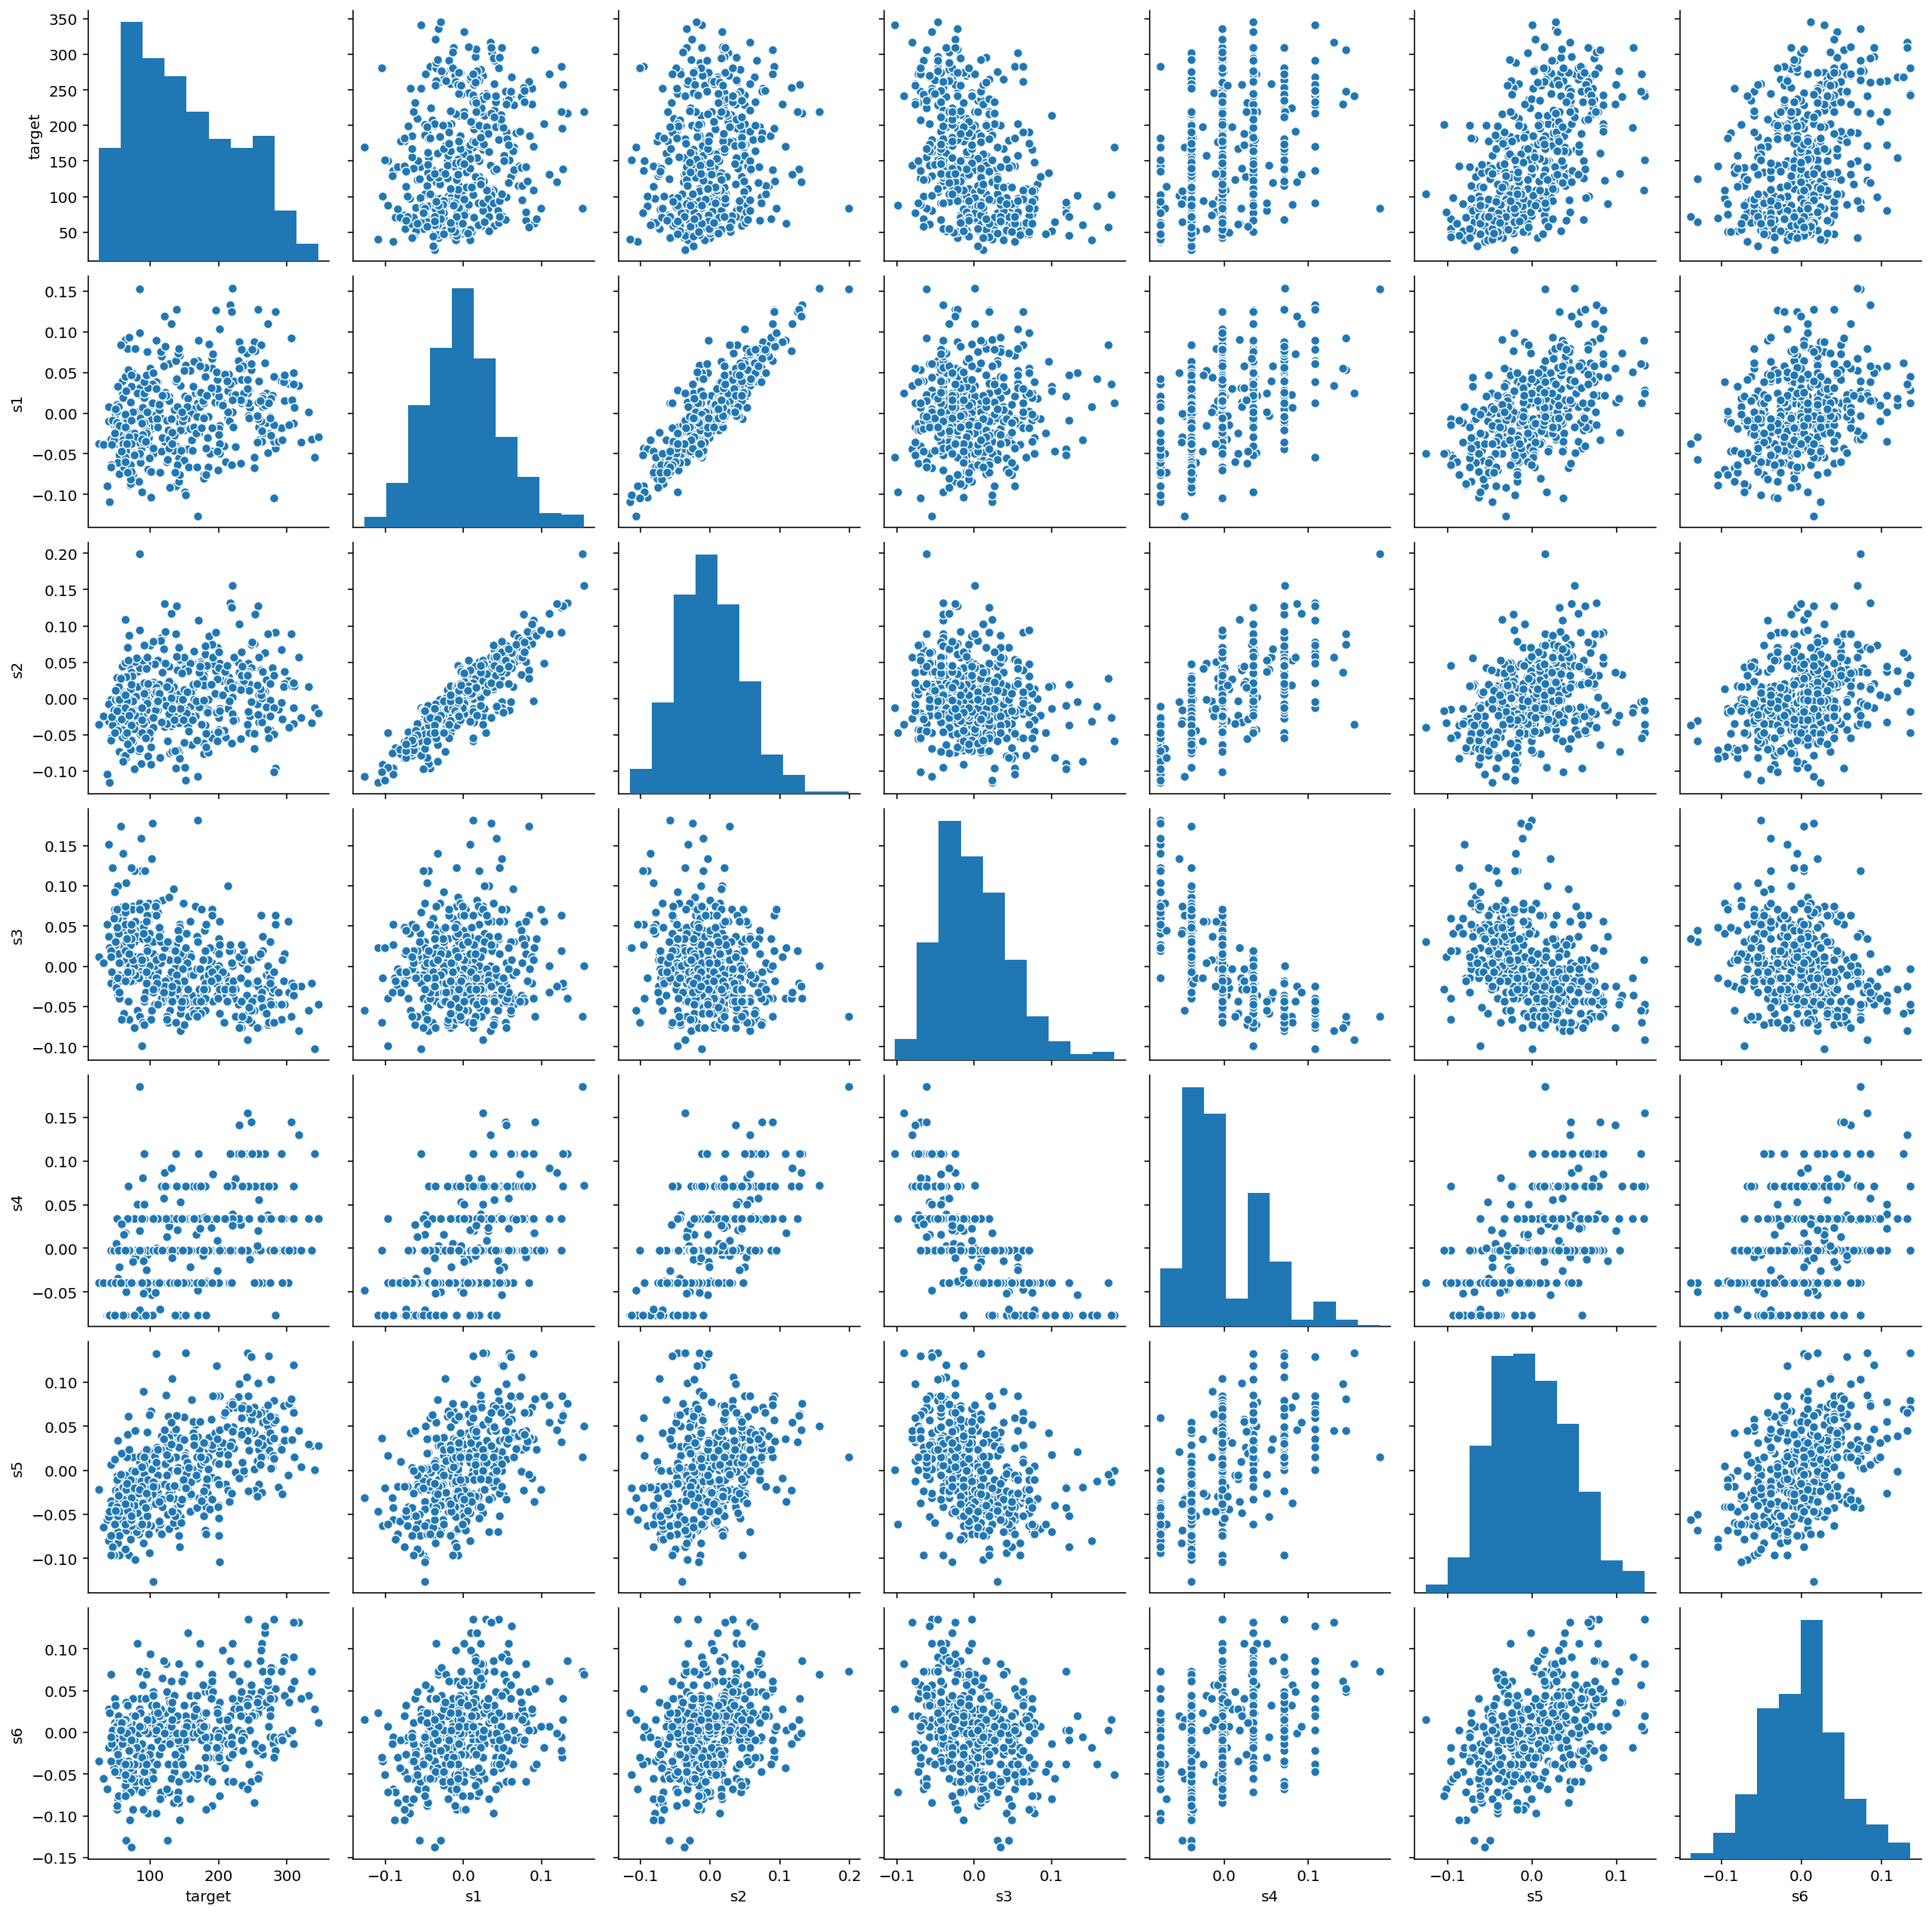

In [30]:
sns.pairplot(df[['target','s1','s2','s3','s4', 's5', 's6']])
plt.show()

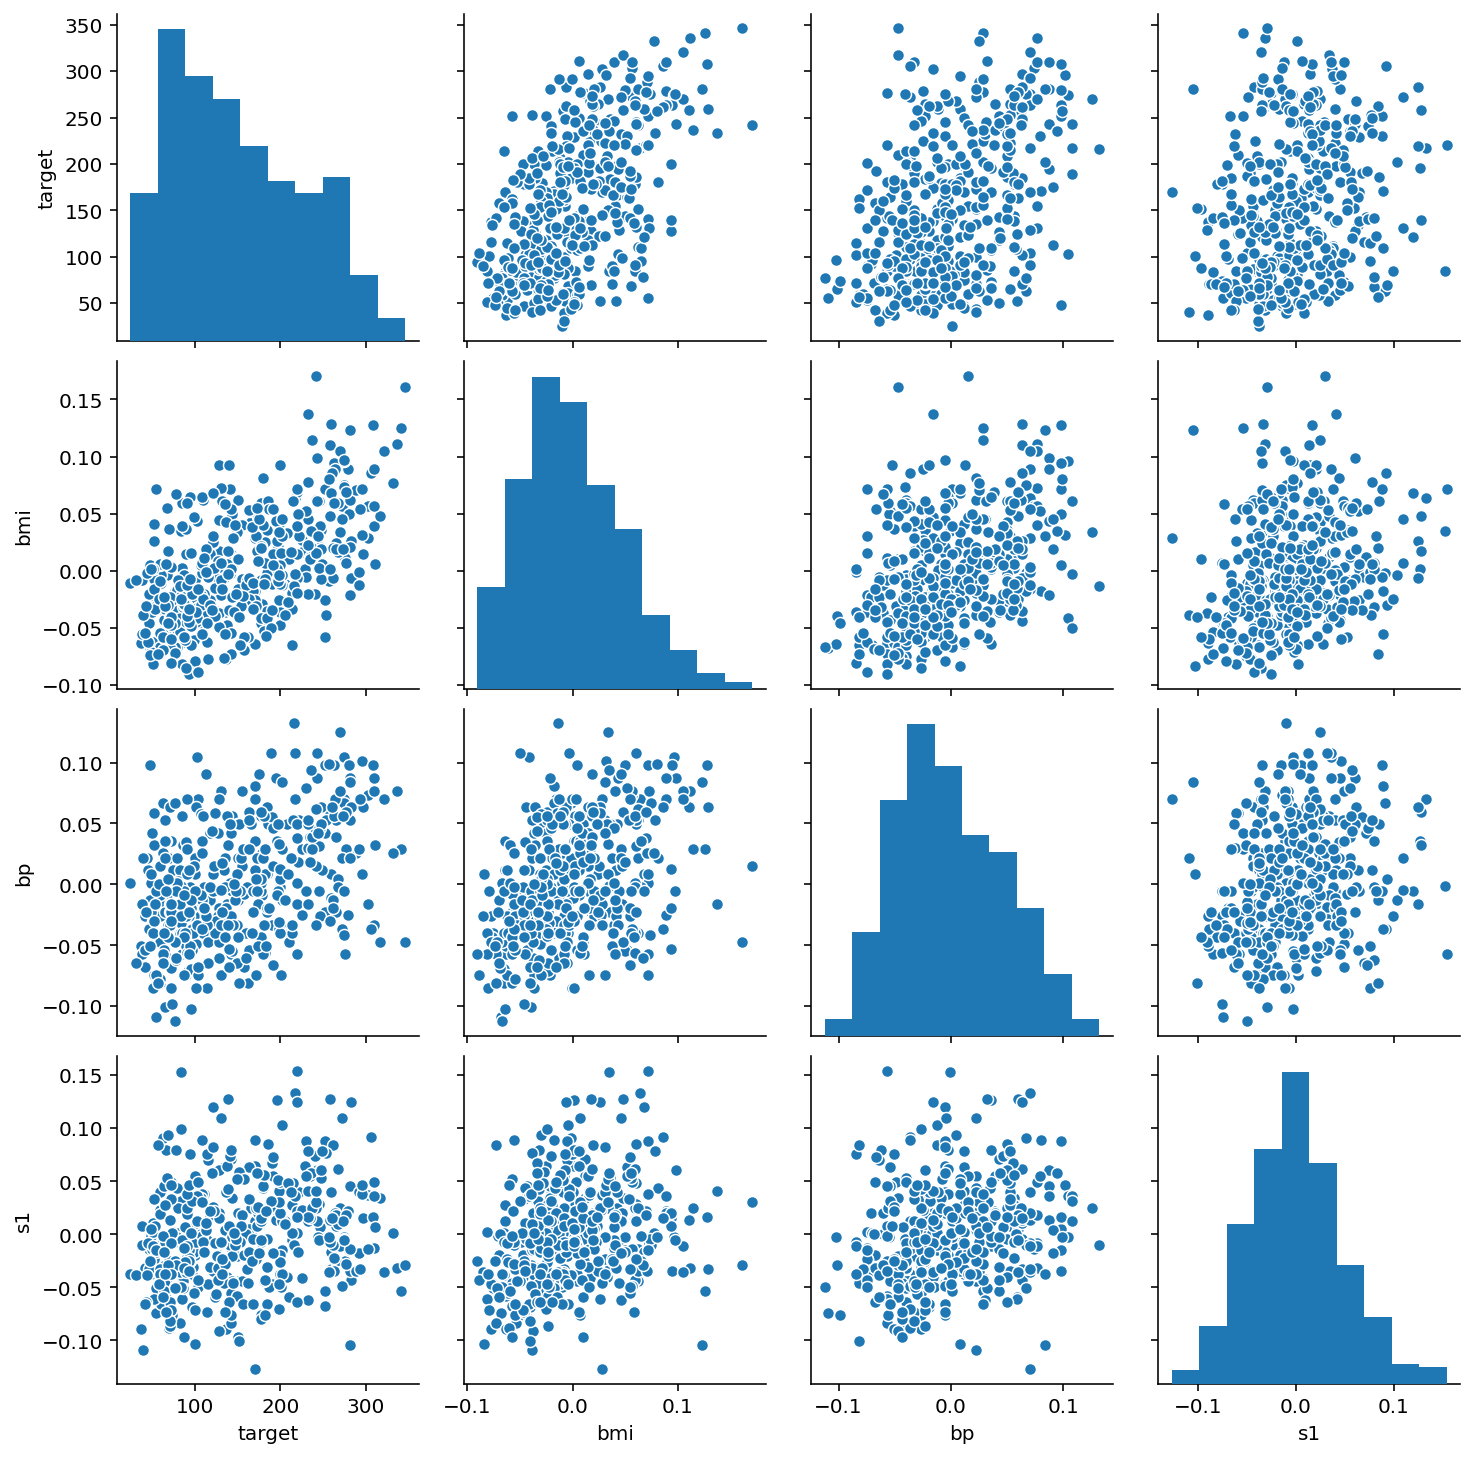

In [7]:
sns.pairplot(df[['target', 'bmi', 'bp' , 's1']])
plt.show()

- 독립변수인 BMI지수와 평균혈압이 종속변수인 당뇨병 진행도와 양의 상관관계를 가지는 것을 볼 수 있다. 
- 또한 두 독립변수 BMI지수와 평균혈압도 서로 양의 상관관계를 가진다. 
- 이렇게 독립변수끼리 상관관계를 가지는 것을 다중공선성(multicolinearity)이라고 한다. 다중공선성은 회귀분석의 결과에 영향을 미칠 수 있다. 

In [8]:
dfX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes.target, columns=["target"])

## (2)(3) 모델에 입력할 데이터 X/ y 준비하기

#### 방법 1: X, y로 데이터 셋을 분리해 가져온 후 열값만 array로 가져오기 

In [9]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [10]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(diabetes_X, 
#                                                     diabetes_y, 
#                                                     test_size=0.2,
#                                                     random_state=12)

# print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

#### 방법 2: daraframe value 값을 불러오면 ->  nd.array로 형변환 

In [12]:
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = df['target'].values

In [13]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## (4) train 데이터와 test 데이터로 분리하기

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### Feature 고르기

#### data 2

In [32]:
X = df[['age', 'bmi', 'bp', 's1','s2' , 's5', 's6']].values
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 7) (353,)
(89, 7) (89,)


## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [33]:
W = np.random.rand(7)
b = np.random.rand()

In [34]:
W

array([0.65263627, 0.06205186, 0.89852601, 0.63677181, 0.99872997,
       0.94314649, 0.9927449 ])

In [35]:
b

0.3098443355185386

### x, w, b를 입력받는 함수

$$
y =  w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6 + w_7x_7 + w_8x_8 + w_9x_9 + w_{10} x_{10} + b+𝑏
$$

In [37]:
def model(X, W, b):
    predictions = 0
    for i in range(7):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

### MSE

In [38]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

### Loss

In [39]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기

#### 손실 함수식 

$$
Loss = MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{i, true}-y_{i, pred})^2
$$

- MSE 값은 정답 y와 예측한 y 간의 차이를 제곱해서 평균한 값
- 모델이 잘 예측할수록 MSE 값은 작아지고, 예측을 잘 못할수록 커지는 값

## $y_{pred}$
$$
y_{pred} =  w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6 + w_7x_7 + w_8x_8 + w_9x_9 + w_{10} x_{10}  + b
$$

### Gradient

In [40]:
def gradient(X, W, b, y):
    # N은 데이터의 개수 
    N = len(X)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [41]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.3677741  -4.28810218 -3.22398754 -1.54076706 -1.26380148 -4.13362044
 -2.7905988 ]
db: -303.64727965475475


## (8) 하이퍼 파라미터인 학습률 설정하기


In [42]:
LEARNING_RATE = 0.1

## (9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [43]:
losses = []

for i in range(1, 3000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6085.8195
Iteration 20 : Loss 5793.5857
Iteration 30 : Loss 5734.7057
Iteration 40 : Loss 5676.9678
Iteration 50 : Loss 5620.4073
Iteration 60 : Loss 5565.2793
Iteration 70 : Loss 5511.5777
Iteration 80 : Loss 5459.2663
Iteration 90 : Loss 5408.3062
Iteration 100 : Loss 5358.6596
Iteration 110 : Loss 5310.2897
Iteration 120 : Loss 5263.1606
Iteration 130 : Loss 5217.2376
Iteration 140 : Loss 5172.4870
Iteration 150 : Loss 5128.8760
Iteration 160 : Loss 5086.3728
Iteration 170 : Loss 5044.9464
Iteration 180 : Loss 5004.5669
Iteration 190 : Loss 4965.2050
Iteration 200 : Loss 4926.8326
Iteration 210 : Loss 4889.4221
Iteration 220 : Loss 4852.9468
Iteration 230 : Loss 4817.3808
Iteration 240 : Loss 4782.6989
Iteration 250 : Loss 4748.8767
Iteration 260 : Loss 4715.8903
Iteration 270 : Loss 4683.7168
Iteration 280 : Loss 4652.3338
Iteration 290 : Loss 4621.7194
Iteration 300 : Loss 4591.8526
Iteration 310 : Loss 4562.7128
Iteration 320 : Loss 4534.2801
Iteration 330 : L

Iteration 2840 : Loss 3129.6108
Iteration 2850 : Loss 3128.8807
Iteration 2860 : Loss 3128.1572
Iteration 2870 : Loss 3127.4400
Iteration 2880 : Loss 3126.7293
Iteration 2890 : Loss 3126.0248
Iteration 2900 : Loss 3125.3266
Iteration 2910 : Loss 3124.6346
Iteration 2920 : Loss 3123.9486
Iteration 2930 : Loss 3123.2687
Iteration 2940 : Loss 3122.5948
Iteration 2950 : Loss 3121.9268
Iteration 2960 : Loss 3121.2647
Iteration 2970 : Loss 3120.6083
Iteration 2980 : Loss 3119.9578
Iteration 2990 : Loss 3119.3128


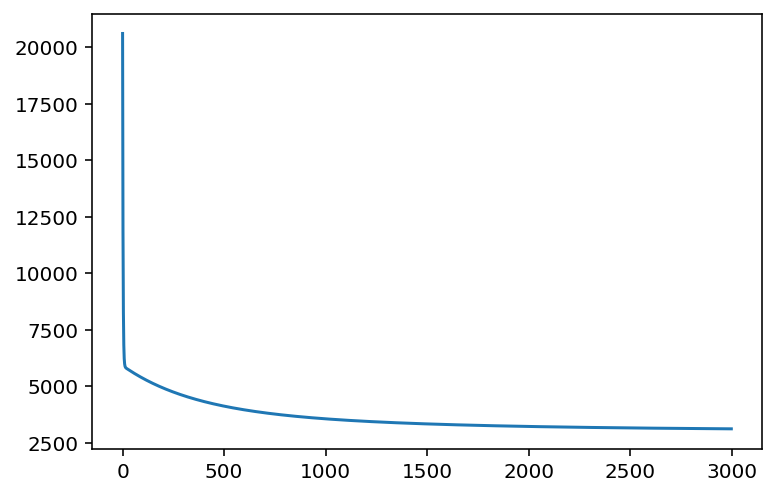

In [44]:
plt.plot(losses)
plt.show()

-  loss 값 완전 별로인거 같은데? ㅎㅎ

In [45]:
W, b

(array([-15.1030916 , 498.25061963, 294.0829302 , -30.71367746,
         -8.16330648, 426.05120484, 191.15155297]),
 153.34097021757614)

## (10) test 데이터에 대한 성능 확인하기

In [46]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3375.055198613814

## (11) 정답 데이터와 예측한 데이터 시각화하기

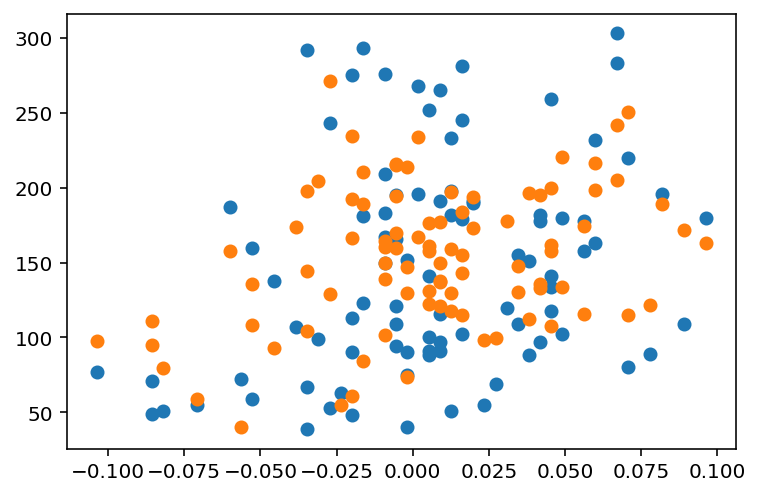

In [47]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

- learning rate가 폭이 좁을 수록 loss 값이 개선되었다. 
- 변수간 상관관계가 크게 어긋나는  sex, s3, s4를 제거하고 모델을 만들어 그나마 loss 값을 개선하였다. 